# Vector Calculus 

Many algorithms in machine learning optimize an objective function with respect to a set of desired model parameters that control how well a model explains the data. For the optimization, we use tools from vector calculus such as __partial derivatives and the gradient__. Lets start with definition of a function:

A function $f$ is a quantity that relates two variables $x$ and $y$ to each other: $y = f(x)$. In this course, we are dealing with vector function. That means we assume any input value $a$ is a vector in $\mathbb{R}^n$ and the target $b = f(a)$ is a real number. The set of all inputs of a function $f$ is called the domain of $f$ (here $\mathbb{R}^n$) and the the set of all potential output is called codomain (here $\mathbb{R}$). Then we write, $f: \mathbb{R}^n \to \mathbb{R}$. For simplicity, when there is no loss of confusion, we dont mention the word 'vector' and we call $f$ just a function. Recall that in the previous chapter, we studied linear functions $T : \mathbb{R}^n \to \mathbb{R}^m$ for some $m,n \in \mathbb{N}$. Functions in this chapter are not neccessarily linear, but we assume they are all differentiable. 


## Tensor Calculus
So far, we have discussed partial derivatives and gradients of functions $f: \mathbb{R}^n \rightarrow \mathbb{R}$, which map vectors to real numbers. In the following, we will further define these concepts in a more general setting. 

#### Derivative of a Vector with Respect to a Vector


Let the function $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$ and a vector $x = [x_1, \ldots, x_n]^T \in \mathbb{R}^n$. We can represent $f(x)$ as:

$$
f(x) = \begin{bmatrix} f_1(x) \\ f_2(x) \\ \vdots \\ f_m(x) \end{bmatrix}
$$

Here, $f_i: \mathbb{R}^n \rightarrow \mathbb{R}$ are real-valued functions for all $i \leq n$. This representation allows us to view a vector-valued function $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$ as a vector of functions $[f_1, \ldots, f_m]^T$.

Therefore, we can define the partial derivative of $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$ with respect to $x_i$ for $i = 1, \ldots, n$:

$$
\frac{\partial f}{\partial x_i} = \begin{bmatrix} \frac{\partial f_1}{\partial x_i} \\ \frac{\partial f_2}{\partial x_i} \\ \vdots \\ \frac{\partial f_m}{\partial x_i} \end{bmatrix}
$$

Note that each partial derivative $\frac{\partial f}{\partial x_i}$ is a column vector. We can define the gradient of $f: \mathbb{R}^n \rightarrow \mathbb{R}$ with respect to a vector $x \in \mathbb{R}^n$ by collecting all partial derivatives with respect to components of $x$:

$$
\frac{\partial f}{\partial x} = \left[ \frac{\partial f}{\partial x_1}, \ldots, \frac{\partial f}{\partial x_n} \right]
$$

This constitutes an $m \times n$ matrix:

$$
J(x) = \frac{\partial f}{\partial x} = \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \ldots & \frac{\partial f_1}{\partial x_n} \\
\frac{\partial f_2}{\partial x_1} & \ldots & \frac{\partial f_2}{\partial x_n} \\
\vdots & \ldots & \vdots \\
\frac{\partial f_m}{\partial x_1} & \ldots & \frac{\partial f_m}{\partial x_n}
\end{bmatrix}
$$


#### Derivative of a Matrix with Respect to a Matrix.

The idea of taking the derivative of a vector function with respect to another vector can be generalized to differentiate a vector function with respect to a matrix. We can even go further to differentiate a matrix function with respect to a matrix.

This can be a little bit tricky. For example, the gradient in this case is not a matrix anymore. In fact, the dimension of the gradient of an $m \times n$ matrix $A$ with respect to a $p \times q$ matrix $B$ should be $(m \times n) \times (p \times q)$, which can be viewed as a higher-dimensional matrix. This object is called a "tensor." The entries of this tensor are given by $J_{ijkl} = \frac{\partial A_{ij}}{\partial B_{kl}}$

**Example (Gradient of Vectors with Respect to Matrices)**

Let $f = Ax$, where $f \in \mathbb{R}^m$, $A \in \mathbb{R}^{m \times n}$, and $x \in \mathbb{R}^n$.

1. Compute the partial derivative of the $i$-th component of $f$ with respect to the $ik$-th component of $A$: $\frac{\partial f_i}{\partial A_{ij}}$.

2. Compute the partial derivative of the $i$-th component of $f$ with respect to the $k$-th row of $A$: $\frac{\partial f_i}{\partial A_{k}}$.

3. Compute the partial derivative of $f_i$ with respect to $A$: $\frac{\partial f}{\partial A}$.

4. Compute the derivative of $f$ with respect to $A.

**Answer:**

1. It will be helpful to explicitly write out $f_i$ in terms of components of $A$:

$$
f_i = \sum_{j = 1}^{n} A_{ij}x_j, \quad i = 1, 2, \dots, m.
$$

Then, the partial derivatives are given by:

$$
\frac{\partial f_i(x)}{\partial A_{ik}} = x_k.
$$

2. By part (1), for any $k \leq n$, we can compute the partial derivatives and collect them in a vector:

$$
\frac{\partial f_i(x)}{\partial A_{k = i}} = \begin{bmatrix} x_1 \\ \vdots \\ x_n \end{bmatrix} = x^T \quad \text{and} \quad \frac{\partial f_i(x)}{\partial A_{k \neq i}} = 0^{T}.
$$

3. By definition,

$$
\frac{\partial f_i(x)}{\partial A} \in \mathbb{R}^{1 \times (m \times n)} = \begin{bmatrix} 0^{T} \\ \vdots \\ 0^T \\ x^{T} \\ 0^{T} \\ \vdots \\ 0^T\end{bmatrix}
$$

where $x^T$ is in the ith row.

4. Note that $\frac{df}{dx} \in \mathbb{R}^{m \times (m \times n)}$. The gradient is the collection of the partial derivatives:

$$
f(x) = \begin{bmatrix} \frac{\partial f_1(x)}{\partial A} \\ \vdots \\ \frac{\partial f_m(x)}{\partial A} \end{bmatrix}.
$$

Working with tensors can be challenging. For instance, how should we define a product between tensors that is consistent with matrix multiplication? This is crucial because the matrix product represents the composition of linear maps. For example, in a multi-layer neural network, we work with compositions of various learning maps. One way to address this is to represent tensors as matrices. The idea is the spaces $\mathbb{R}^{m \times n}$ of $m \times n$ matrices and $\mathbb{R}^{mn}$ of $mn$ vectors contain the same information and can be considered equivalent (Why?). 

This equivalence allows us to reshape an $mxn$ matrix into a vector of length $mn$. When calculating the gradient of an ${m \times n}$ matrix with respect to a ${p \times q}$ matrix, the resulting gradient tensor (AKA Jacobian) will be of size $mn \times pq$. In practical applications, reshaping matrices into vectors and working with this Jacobian matrix is often preferred. In this case, the chain rule simplifies to matrix multiplication, whereas when dealing with a Jacobian tensor, it's important to pay closer attention to the dimensions that need to be summed out.

For example, suppose we have $A \in \mathbb{R}^{4 \times 2}$ and $x \in \mathbb{R}^3$. The following figure illustrates how we can find $\frac{dA}{dx}$ using these approaches:

(If the picture is not loading, go to [https://mml-book.github.io/book/mml-book.pdf] Gradients of Matrices page 155)

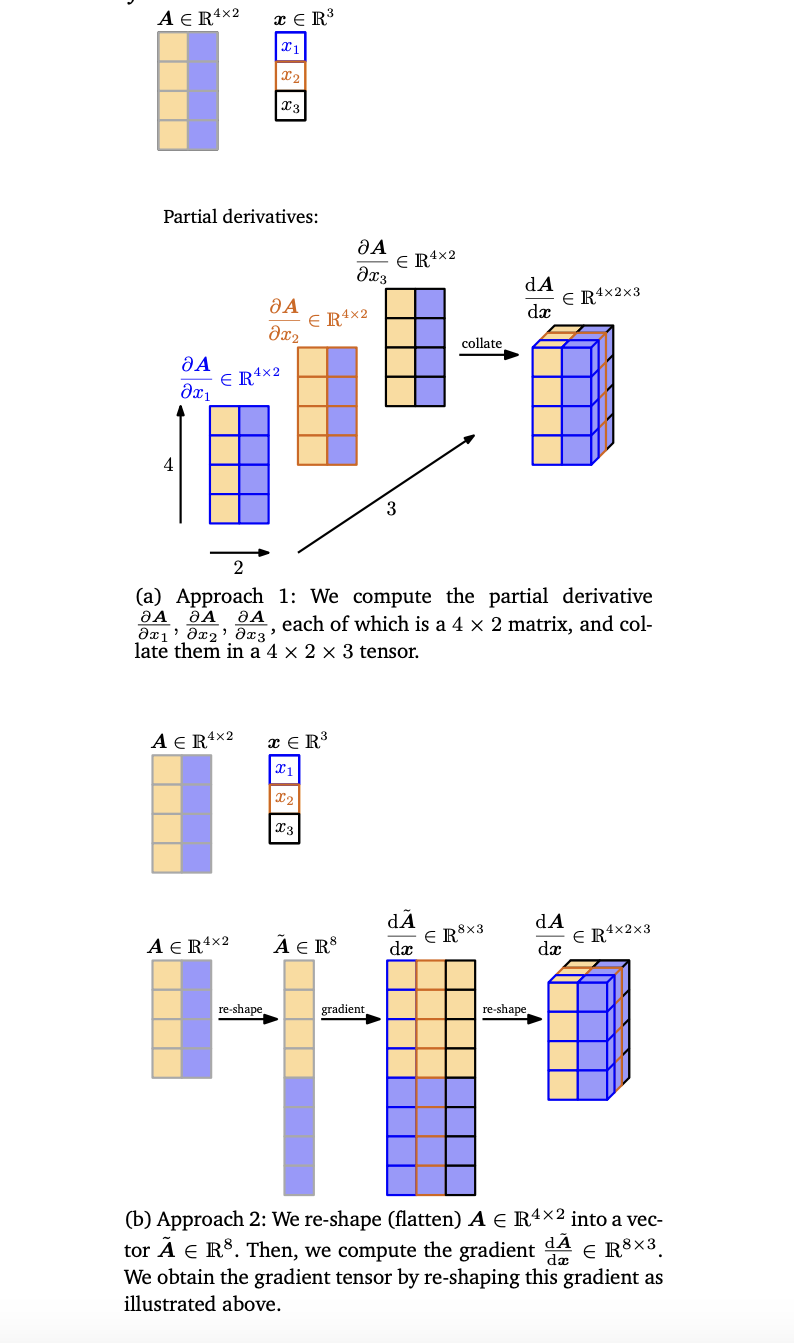

#### Tensor Calculus Using Numpy

We can compute the gradient using `numpy.gradient`. This function takes an array that contains a sample of the y-values of a function, $f$. It's worth noting that the gradient at $x = a$ is defined as the change in $y$ divided by the change in $x$, which is given by the formula:

$$
\frac{f(a + h) - f(a - h)}{2h}.
$$

Here, x represents the list index. Additionally, you have the option to specify the spacing between the f-values. If not specified, the default value for h is 1, which means the difference between adjacent values is always 1.

Additionally, at the boundaries, the _first difference_ is calculated. For example, at the first index ($0$), we cannot have a term like $0 - h$. Instead, we compute it as:

$$
\frac{f(0 + h) - f(0)}{h}.
$$

In [2]:
import numpy as np
# f is a numpy list containing samples of a scalar function.
f = np.array([1, 2, 4, 7, 11, 16])
# this is the gradient of f with respect to indices
np.gradient(f)

array([1. , 1.5, 2.5, 3.5, 4.5, 5. ])

In [3]:
# Let's set h = 2 to specify the spacing between f values
np.gradient(f, 2)

array([0.5 , 0.75, 1.25, 1.75, 2.25, 2.5 ])

__Group Work__


Let $f(x) = Ax$, where $f(x)$ is a vector function in $\mathbb{R}^2$, $A$ is an ${2 \times 3}$ matrix, and $x$ is a vector in $\mathbb{R}^3$. 



   1. Compute $\frac{df}{dx}$.



   2. Compute $\frac{df}{dA}$



__Answer:__ 

1. To compute the gradient $\frac{df}{dx}$, we first determine the dimension of $\frac{df}{dx}$: Since $f : \mathbb{R}^3 \to \mathbb{R}^2$, $\frac{df}{dx} \in \mathbb{R}^{2 \times 3}$. By definition, the gradient is the collection of the partial derivatives. It will be helpful to explicitly write out the components $f(x)$ is in terms of components of $x$ and $A$. Let $f(x) = \begin{bmatrix} f_1(x) \\ f_2(x)\end{bmatrix}$. Then


$$f_1(x) = A_{11}x_1 + A_{12}x_2 + A_{13}x_3 \quad \text{and} \quad f_2(x) = A_{21}x_1 + A_{22}x_2 + A_{23}x_3$$


Now, let's compute the partial derivatives of $f_1$ and $f_2$ with respect to each component of $x$:
   
$\frac{\partial f_1}{\partial x_1} = A_{11}$,   $\frac{\partial f_1}{\partial x_2} = A_{12}$,   $\frac{\partial f_1}{\partial x_3} = A_{13}$, $\frac{\partial f_2}{\partial x_1} = A_{21}$,   $\frac{\partial f_2}{\partial x_2} = A_{22}$,   $\frac{\partial f_2}{\partial x_3} = A_{23}$.
   
   Therefore, the gradient $\frac{df}{dx}$ is a $2 \times 3$ matrix given by:
   
   $\frac{df}{dx} = \begin{bmatrix}
   A_{11} & A_{12} & A_{13} \\
   A_{21} & A_{22} & A_{23}
   \end{bmatrix}$.
Which is exactly $A$. Compare this with the derivative of the single variable function $y = mx$.Step1: We first write the dimension of tensor $\frac{df}{dA}$

Step 2: Now we write down explicity the components of $f$ with respect to components of $x$ and $A$.

Step 3: Now, let's compute the partial derivatives

Therefore, the gradient $\frac{df}{dA}$ is 


2. 
Step1: We first write the dimension of tensor $\frac{df}{dA}$

Step 2: Now we write down explicity the components of $f$ with respect to components of $x$ and $A$.

Step 3: Now, let's compute the partial derivatives

Therefore, the gradient $\frac{df}{dA}$ is ...


__Group Work__

Suppose $R \in \mathbb{R}^{M \times N}$ and $f : \mathbb{R}^{M \times N} \rightarrow \mathbb{R}^{N \times N}$ with 

$$f(R) = R^\top R$$

Note that $f$ takes in an $M\times N$ matrix and returns an $N\times N$ matrix. Compute the gradient $\frac{dK}{dR}$.

Use a new variable $K := R^\top R$ for simplicity. 

__Step 1__ Write $K_{pq}$ in terms of $R_{ij}$

__Step 2__ Compute the partial derivitives $\frac{dK_{pq}}{dR_{ij}}$.

__Step 3__  Whats the dimension of the tensor $\frac{dK}{dR}$? Find it.

#### Useful Identities for Computing Gradients

In the following, we list some useful gradients that are frequently required in a machine learning context (Petersen and Pedersen, 2012). Here, we use tr(·) as the trace, det(·) as the determinant (see linear algebra sections) and $f(X)^{−1}$ as the inverse of $f(X)$, assuming it exists. Spend sometime and make sure they make sense to you. For the full list check out mml-book page 159.


1. **Transpose of Derivative of Matrix Function**:
   - $\frac{\partial}{\partial X}f(X)^\top = \left(\frac{\partial f(X)}{\partial X}\right)^\top$
   
2. **Derivative of Trace of a Matrix Function**:
   - $\frac{\partial}{\partial X} \text{tr}(f(X)) = \text{tr}\left(\frac{\partial f(X)}{\partial X}\right)$
   - This equation provides a way to compute the derivative of the trace of a matrix-valued function. It states that it's equivalent to the trace of the derivative of the function.

3. **Derivative of Determinant of a Matrix Function**:
   - $\frac{\partial}{\partial X} \text{det}(f(X)) = \text{det}(f(X))\ \text{tr}\left(f(X)^{-1} \frac{\partial f(X)}{\partial X}\right)$
   - This equation gives the derivative of the determinant of a matrix-valued function. It involves the determinant of $f(X)$ and the trace of the product of the inverse of $f(X)$ with the derivative of $f(X)$.

4. **Derivative of the Inverse of a Matrix Function**:
   - $\frac{\partial}{\partial X} f(X)^{-1} = -f(X)^{-1} \frac{\partial f(X)}{\partial X} f(X)^{-1}$
   - This equation calculates the derivative of the inverse of a matrix-valued function $f(X)$. It's a crucial formula in cases where you need to find how the inverse changes with respect to changes in $X$.

These equations are essential tools in matrix calculus, particularly when dealing with optimization and gradient-based algorithms in machine learning and mathematical modeling.

#### Exercise: 

__Gradient of a Least-Squares Loss in a Linear Model__

1- Let us consider the linear model 

$$
y = M b
$$

where $M\in \mathbb{R}^{N\times D}$ is the matrix that collects the input features, $b\in \mathbb{R}^D$ is the parametr vector, and $y$ is our observations. Moreover, we define the functions

$$
e(b) = y - Mb \quad \text{and} \quad  L(e) = \|e\|
$$

L is called a least-squares loss function. Compute $\frac{\partial L}{\partial b}$. 

__Hint:__ You can either use the chane rule $\frac{\partial L}{\partial b} = \frac{\partial L}{\partial e}\frac{\partial e}{\partial b}$, or use the function $L_2(b):= \|y-Mb\|^2$.